In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snb

# Getting Data

In [2]:
#fetching the data
data=pd.read_csv('train_revised.csv')

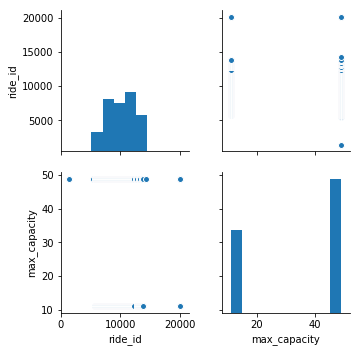

In [6]:
#viewing the data from the first 5 rows
data
snb.pairplot(data)

In [11]:
columns = ['seat_number', 'payment_method','payment_receipt','max_capacity']
#columns = ['ride_id', 'travel_date','travel_time','travel_from','travel_to','car_type']
data2=data.drop(columns,axis=1)
data2.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type
0,1442,17-10-17,7:15,Migori,Nairobi,Bus
1,5437,19-11-17,7:12,Migori,Nairobi,Bus
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus
4,5778,27-11-17,7:12,Migori,Nairobi,Bus


In [12]:
#converting the date to the day of the week
# 0 is monday
# 6 is Sunday
data2['travel_date'] = pd.to_datetime(data2['travel_date'],infer_datetime_format=False)
data2['travel_date'] = data2['travel_date'].dt.dayofweek
data2.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type
0,1442,1,7:15,Migori,Nairobi,Bus
1,5437,6,7:12,Migori,Nairobi,Bus
2,5710,6,7:05,Keroka,Nairobi,Bus
3,5777,0,7:10,Homa Bay,Nairobi,Bus
4,5778,0,7:12,Migori,Nairobi,Bus


In [13]:
data2['travel_time'] = data2['travel_time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))


In [14]:
data2.head()


,ride_id,travel_date,travel_time,travel_from,travel_to,car_type
0,1442,1,435,Migori,Nairobi,Bus
1,5437,6,432,Migori,Nairobi,Bus
2,5710,6,425,Keroka,Nairobi,Bus
3,5777,0,430,Homa Bay,Nairobi,Bus
4,5778,0,432,Migori,Nairobi,Bus


In [15]:
from numpy import argmax
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
travel_from = data2['travel_from']
values = array(travel_from)
print(values)
# integer encode
label_encoder = LabelEncoder()
data2['travel_from']=integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)


['Migori' 'Migori' 'Keroka' ... 'Migori' 'Awendo' 'Kisii']
[9 9 4 ... 9 0 7]


In [16]:
data2.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type
0,1442,1,435,9,Nairobi,Bus
1,5437,6,432,9,Nairobi,Bus
2,5710,6,425,4,Nairobi,Bus
3,5777,0,430,1,Nairobi,Bus
4,5778,0,432,9,Nairobi,Bus


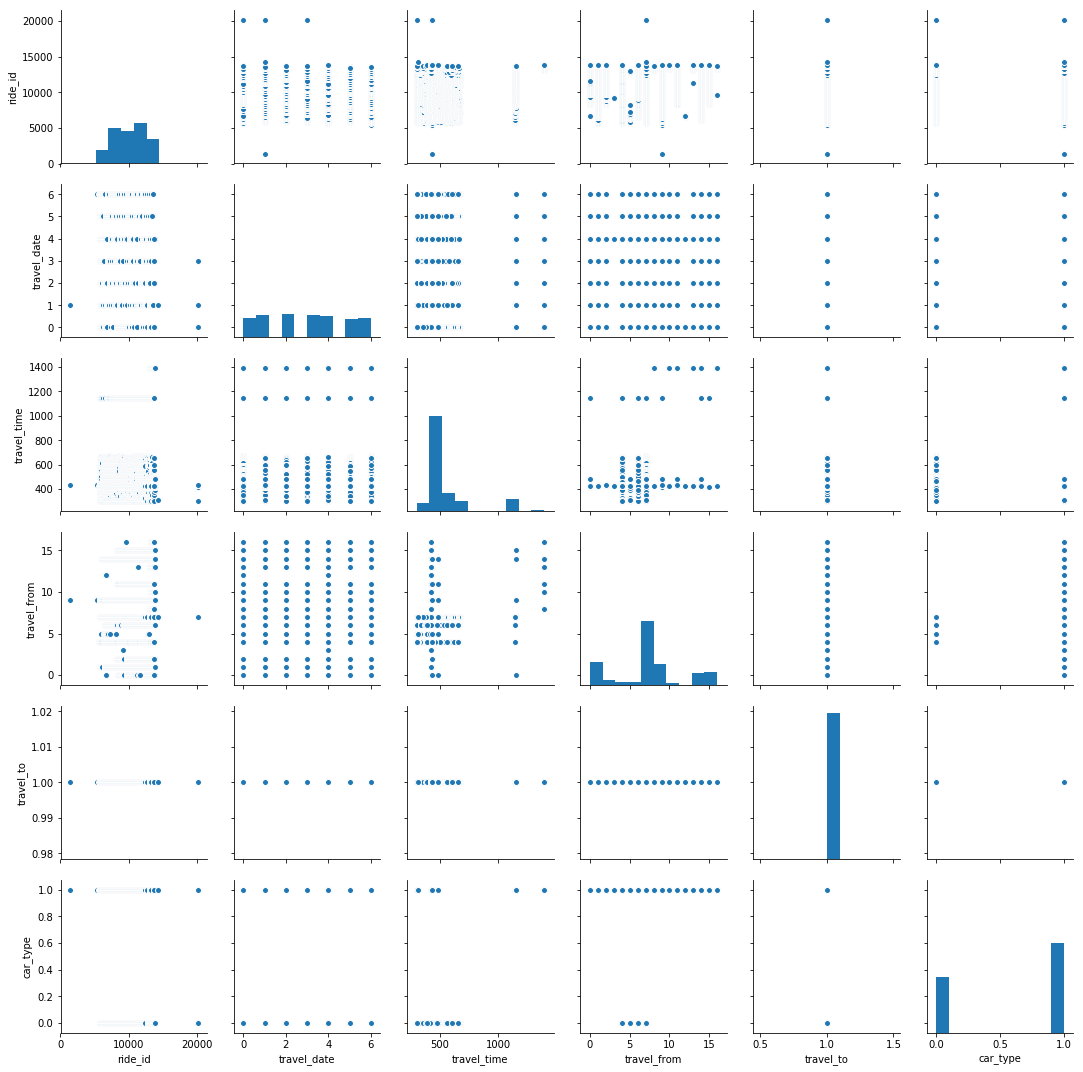

In [17]:
data2['travel_to'] = pd.get_dummies(data2['travel_to'])
data2['car_type'] = pd.get_dummies(data2['car_type'])
snb.pairplot(data2)

In [18]:
x = data2.drop(['travel_time'],axis=1)
y = data2.travel_time

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [20]:
model = RandomForestRegressor(n_estimators=100, criterion='mae', n_jobs=-1)

In [21]:
model.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
pred_train = model.predict(x)
print(mean_absolute_error(pred_train,y))

18.45856171943073


In [23]:
#getting insights from our data
data2.info()

data2.describe() #getting statistical insights from our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 6 columns):
ride_id        51645 non-null int64
travel_date    51645 non-null int64
travel_time    51645 non-null int64
travel_from    51645 non-null int64
travel_to      51645 non-null uint8
car_type       51645 non-null uint8
dtypes: int64(4), uint8(2)
memory usage: 1.7 MB


,ride_id,travel_date,travel_time,travel_from,travel_to,car_type
count,51645.000000,51645.000000,51645.000000,51645.000000,51645.0,51645.000000
mean,10188.645793,2.916023,532.463356,7.373666,1.0,0.619324
std,2211.295708,1.951749,220.017158,4.175185,0.0,0.485558
min,1442.000000,0.000000,300.000000,0.000000,1.0,0.000000
25%,8287.000000,1.000000,426.000000,7.000000,1.0,0.000000
50%,10353.000000,3.000000,433.000000,7.000000,1.0,1.000000
75%,12029.000000,5.000000,550.000000,9.000000,1.0,1.000000
max,20117.000000,6.000000,1390.000000,16.000000,1.0,1.000000


# predicting

In [137]:
data_test = pd.read_csv('test_questions.csv')

In [138]:
#converting the date to the day of the week
# 0 is monday
# 6 is Sunday
data_test['travel_date'] = pd.to_datetime(data_test['travel_date'],infer_datetime_format=False)
data_test['travel_date'] = data_test['travel_date'].dt.dayofweek
data_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,0,07:06,Kisii,Nairobi,Bus,49
1,256,6,11:08,Kisii,Nairobi,shuttle,11
2,275,4,05:00,Kisii,Nairobi,shuttle,11
3,285,4,09:10,Kisii,Nairobi,shuttle,11
4,286,4,09:20,Kisii,Nairobi,shuttle,11


In [139]:
data_test['travel_time'] = data_test['travel_time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))


In [140]:
from numpy import argmax
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
travel_from= data_test['travel_from']
values = array(travel_from)
print(values)
# integer encode
label_encoder = LabelEncoder()
data_test['travel_from']=integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)


['Kisii' 'Kisii' 'Kisii' ... 'Rongo' 'Ndhiwa' 'Migori']
[ 5  5  5 ... 12  8  7]


In [141]:
data_test['travel_to'] = pd.get_dummies(data_test['travel_to'])
data_test['car_type'] = pd.get_dummies(data_test['car_type'])
data_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,0,426,5,1,1,49
1,256,6,668,5,1,0,11
2,275,4,300,5,1,0,11
3,285,4,550,5,1,0,11
4,286,4,560,5,1,0,11


In [142]:
data3 = data_test.drop(['max_capacity'],axis=1)

In [143]:
data3.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type
0,247,0,426,5,1,1
1,256,6,668,5,1,0
2,275,4,300,5,1,0
3,285,4,550,5,1,0
4,286,4,560,5,1,0


In [144]:
x_test = data3.drop(['ride_id'],axis=1)
test_pred=model.predict(x_test)

In [149]:
q={'ride_id': data3['ride_id'], 'number_of_ticket' : test_pred}
df_pred =pd.DataFrame(data=q)
df_pred = df_pred[['ride_id', 'number_of_ticket']]

In [146]:
df_pred.head()

,ride_id,number_of_ticket
0,247,651.90
1,256,426.22
2,275,426.22
3,285,426.22
4,286,426.22


In [147]:
df_pred.to_csv('pred.csv')